In [1]:
import numpy as np
import math as mth
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import Boundary_Functions as bf
import timeit

from mpmath import *
from pynverse import inversefunc
from scipy.special import gamma as gamma
from scipy.special import gammaincc as gamma3
from mpmath import gammainc as gamma2

#import warnings
#warnings.filterwarnings("ignore")

start = timeit.default_timer()

In [2]:
rnp=np.load('rnp.npy')
rnputil=np.load('rnputil.npy')
urange=np.load('urange.npy')
vrange=np.load('vrange.npy')

In [3]:
print(rnputil)

N=int(rnputil[0])
Nu=int(rnputil[1])
Nv=int(rnputil[2])
ru0=float(rnputil[3])
dr0v=float(rnputil[4])
M0=float(rnputil[5])
Q=float(rnputil[6])
umax=Nu/N
vmax=Nv/N

print('N='+str(N))

if M0>0.0:
    du0=M0/N
    dv0=du0

rplus=M0+(M0**2-Q**2)**(0.5)
rminus=M0-(M0**2-Q**2)**(0.5)
    
numpoints=Nu*Nv
print(str(numpoints)+" points")

if Q==0.0:
    predtime=numpoints/(17530)
if Q>0.0:
    predtime=numpoints/(259000)
print("Runtime: about "+str(format(predtime/60,'.2f'))+" minutes")

[  1.60000000e+02   1.92000000e+03   4.80000000e+03   5.00000000e+00
   4.00000000e-01   1.00000000e+00   0.00000000e+00]
N=160
9216000 points
Runtime: about 8.76 minutes


In [4]:
if M0==0.0:
    rlist=np.zeros((Nu,Nv))
    dr0u=-1/(4*dr0v)

    for i in range(0,Nu):
        for j in range(0,Nv):
            rlist[i][j]=ru0+dr0u/N*i+dr0v/N*j


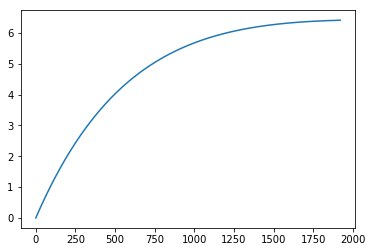

In [5]:
if M0>0.0 and Q==0.0:
    ulist=np.empty((Nu))*np.nan
    vlist=np.empty((Nv))*np.nan
    
    #rlistu=ru0+bf.dr2(M0,dr0v,ru0)*np.arange(0,umax,du0)
    #rlistv=ru0+dr0v*np.arange(0,vmax,dv0)

    rlistu=rnp[:,0]
    rlistv=rnp[0,:]
    
    #print(rlistv)

    ulist=np.empty((Nu))
    vlist=np.empty((Nv))

    for i in range(0,Nu):
        ulist[i]=bf.rbounschinv(M0,ru0,bf.dr2(M0,dr0v,ru0)*(bf.esig(M0,rlistu[0]))**(1),rlistu[i])
    
    for j in range(0,Nv):
        vlist[j]=bf.rbounschinv(M0,ru0,dr0v*bf.esig(M0,rlistu[0])**(1),rlistv[j])

    #print(vlist)
    plt.plot(ulist)
    plt.show()

In [6]:
if M0>0.0 and Q==0.0:        
    rlist=np.zeros((Nu,Nv))*np.nan

    for i in range(0,Nu):
        for j in range(0,Nv):
            rlist[i][j]=bf.rsch(M0,ru0,dr0v,ulist[i],vlist[j])
            #if rlist[i][j]>0.0:
                #continue
            #else:
                    #rlistv[j]=np.nan
                #break
            

In [7]:
if M0>0.0 and Q>0.0:
    #rlistu=ru0+bf.dr2rn(M0,Q,dr0v,ru0)*np.arange(0,umax,du0)
    #rlistv=ru0+dr0v*np.arange(0,vmax,dv0)

    rlistu=rnp[:,0]
    rlistv=rnp[0,:]
    
    print(bf.esigrn(M0,Q,ru0))
    print(rlistu)

    ulist=np.empty((Nu))*np.nan
    vlist=np.empty((Nv))*np.nan

    for i in range(0,Nu):
        ulist[i]=bf.rbounrninv(float(rlistu[i]),M0,Q,ru0,bf.dr2rn(M0,Q,dr0v,ru0)*(bf.esigrn(M0,Q,rlistv[0]))**(1))

    for i in range(0,Nv):
        vlist[i]=bf.rbounrninv(float(rlistv[i]),M0,Q,ru0,dr0v*(bf.esigrn(M0,Q,rlistv[0]))**(1))

    plt.plot(ulist)#,rlistu)
    plt.xlabel('u')
    plt.ylabel('r')
    #plt.xlim(0,1)
    plt.ylim(0,5)
    plt.grid()
    plt.show()    
    
    plt.plot(vlist)#,rlistv)
    plt.xlabel('v')
    plt.ylabel('r')
    #plt.xlim(0,1)
    #plt.ylim(4,5)
    plt.grid()
    plt.show()

    print(ulist)

In [8]:
if M0>0.0 and Q>0.0:
    rlist=np.zeros((Nu,Nv))*np.nan
    for i in range(0,Nu):
    #for j in range(0,Nv):
        rlist[i]=bf.rrn(M0,Q,ru0,dr0v,ulist,vlist,i).reshape(Nv)

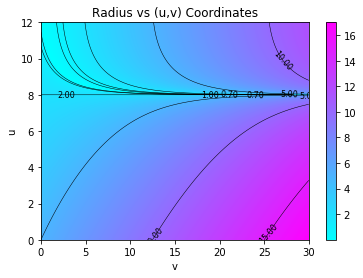

In [9]:
levels=np.arange(5.0, np.nanmax(rlist), 5.0 )
levels=np.insert(levels,0,[rminus,.7,1.0,rplus])

plot1=plt.imshow(rlist,cmap=plt.cm.cool,extent=(0,vmax,0,umax),aspect='auto',origin='lower',vmax=np.nanmax(rlist))
plot4=plt.contour(rlist, levels,linewidths=0.5,colors='black',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plt.clabel(plot4, levels,  
           inline=0, inline_spacing=0, 
           fmt='%1.2f',rightside_up=True,
           fontsize=8)
#sample3=plt.plot(vrange[-1],drdvnplist)
#sample3=plt.plot(vrange,dsigdvnplist)
plt.xlabel('v')
plt.ylabel('u')
plt.xlim()
plt.colorbar(plot1)
plt.title('Radius vs (u,v) Coordinates')
#plt.savefig('Test1-2.png',dpi=300)
plt.show()


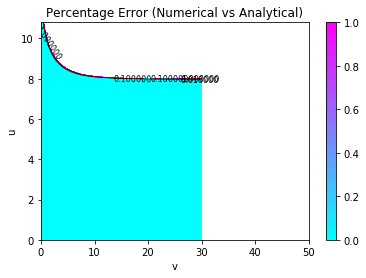

In [14]:
rdiff=np.ma.masked_invalid(abs((rlist-rnp)/rlist)*100)


if M0==0.0:
    levelsdiff=[10**(-11.0),10**(-10.0),10**(-9.0)]
if M0>0.0: #and Q==0.0:
    levelsdiff=[.01,.1,1,10,50]
#if M0>0.0 and Q>0.0:
    #levelsdiff=[10**(-2),10**(-1),10**(0),10**(1),20,30]

plot1=plt.pcolormesh(vrange,urange,rdiff,cmap=plt.cm.cool,vmin=0.0,vmax=1.0)
plt.ylim(0,10.8)
plot4=plt.contour(vrange,urange,rdiff, levelsdiff,linewidths=0.5,colors='black',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot5=plt.contour(vrange,urange,rdiff, [rplus],linewidths=0.5,colors='red',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
plot6=plt.contour(vrange,urange,rlist, [rminus],linewidths=1.0,linestyles='dashed',colors='blue',extent=(0,vmax,0,umax),aspect='auto',origin='lower')
#fmt={str(10**(-2)):10**(-2)}
plt.clabel(plot4, levelsdiff,  
           inline=0, inline_spacing=0, 
           fmt='%1.6f',rightside_up=True,
           fontsize=8)
#sample3=plt.plot(vrange[-1],drdvnplist)
#sample3=plt.plot(vrange,dsigdvnplist)
plt.xlabel('v')
plt.ylabel('u')
plt.xlim(0,50)
plt.ylim(0.0,10.8)
plt.colorbar(plot1)
plt.title('Percentage Error (Numerical vs Analytical)')
#plt.savefig('RN-err-max-N_60.png',dpi=300)
plt.show()

In [11]:
print(rnp)
print(rlist)
print(rdiff[0,-1])
print(rdiff[-1,0])


print(rdiff)

[[  5.           5.0025       5.005      ...,  16.9925      16.995       16.9975    ]
 [  4.99765625   5.00015547   5.00265469 ...,  16.98905302  16.99155295
   16.99405288]
 [  4.9953125    4.99781094   5.00030938 ...,  16.98560505  16.98810492
   16.99060478]
 ..., 
 [  0.50703125   0.49456122   0.48166335 ...,          nan          nan
           nan]
 [  0.5046875    0.49213794   0.47915343 ...,          nan          nan
           nan]
 [  0.50234375   0.48971388   0.47664182 ...,          nan          nan
           nan]]
[[  5.           5.0025       5.005      ...,  16.9925      16.995       16.9975    ]
 [  4.99765625   5.00015547   5.00265469 ...,  16.98905302  16.99155295
   16.99405288]
 [  4.9953125    4.99781094   5.00030938 ...,  16.98560505  16.98810492
   16.99060478]
 ..., 
 [  0.50703125   0.4945601    0.48166089 ...,  11.71262483  11.71505638
   11.71748794]
 [  0.5046875    0.49213679   0.47915092 ...,  11.71330577  11.71573734
   11.71816891]
 [  0.50234375   0.48

In [12]:
stop = timeit.default_timer()

In [13]:
acttime=stop - start

print(str(acttime)+' seconds')
print(str((acttime)/60)+' minutes')
print(str((acttime)/3600)+' hours')

print(str((numpoints)/(stop - start))+' points per second') 

exttime=format((acttime-predtime)/60,'.2f')

print("Took "+str(exttime)+" more minutes")

658.8304621136264 seconds
10.980507701893773 minutes
0.18300846169822954 hours
13988.424230466966 points per second
Took 2.22 more minutes
